# Importing  Libraries and Loading Dataset

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [10]:
#Loading Dataset
data = pd.read_csv('Piece_Dimension.csv')


# Data Overview

In [11]:
data.head()

,Item_No,Length,Width,Height,Operator
0,1,102.67,49.53,19.69,Op-1
1,2,102.50,51.42,19.63,Op-1
2,3,95.37,52.25,21.51,Op-1
3,4,94.77,49.24,18.60,Op-1
4,5,104.26,47.90,19.46,Op-1


In [12]:
data.describe()

,Item_No,Length,Width,Height
count,500.000000,500.000000,500.00000,500.000000
mean,250.500000,99.769140,49.93288,20.293220
std,144.481833,4.107471,2.11382,1.051718
min,1.000000,87.520000,42.74000,17.370000
25%,125.750000,96.835000,48.34000,19.475000
50%,250.500000,99.565000,49.82500,20.310000
75%,375.250000,102.035000,51.46250,21.142500
max,500.000000,116.600000,58.26000,23.390000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Item_No   500 non-null    int64  
 1   Length    500 non-null    float64
 2   Width     500 non-null    float64
 3   Height    500 non-null    float64
 4   Operator  500 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 19.7+ KB


# Data Preprocessing

In [14]:
# Assuming 'Item_No' is a continuous variable
# Convert 'Item_No' to numerical if it's not already
data['Item_No'] = pd.to_numeric(data['Item_No'], errors='coerce')

In [15]:
# Use ColumnTransformer for one-hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Operator'])], remainder='passthrough')
X = ct.fit_transform(data.drop('Item_No', axis=1))

In [16]:
# Assuming 'Item_No' is the target variable
y = data['Item_No']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploratory Data Analysis (EDA)

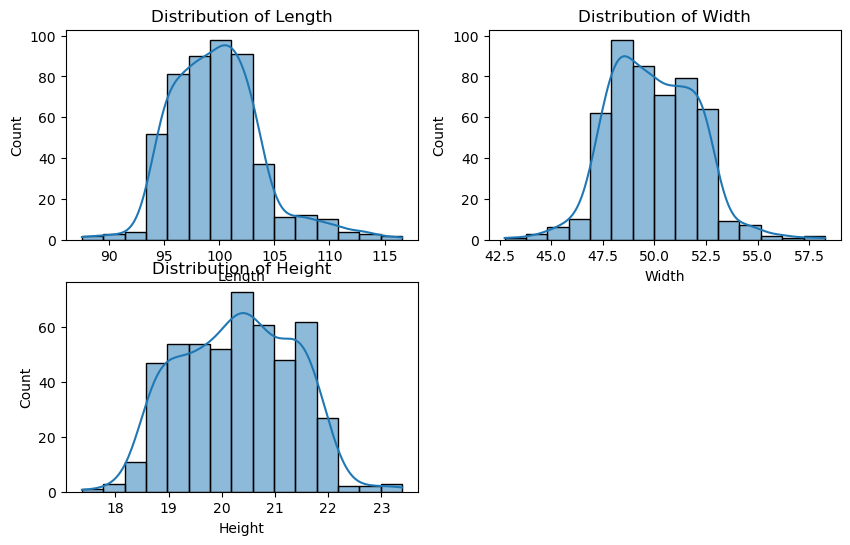

In [18]:
# Visualize the distribution of numerical features
plt.figure(figsize=(10, 6))
for i, column in enumerate(['Length', 'Width', 'Height']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[column], bins=15, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')


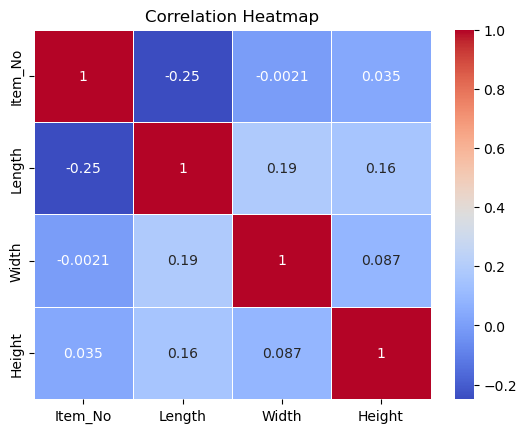

In [19]:
# Correlation Analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Model Training

In [20]:
# Build a predictive model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Model Evaluation

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 82.9820930277778


# Visualize Results

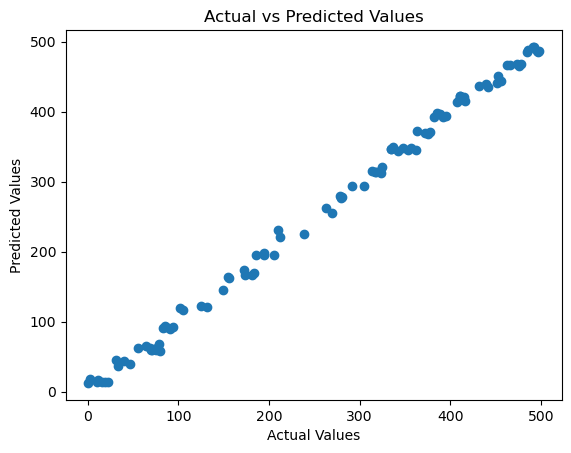

In [22]:
# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
